### Naive Bayes Classifier

In [3]:
# Importing librarires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Importing Social Network Advertisement dataset
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
# Extract independent and dependent variables
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [34]:
# Split the dataset into training and test data
from sklearn.cross_validation import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print ('X_Train_Shape: {0}'.format(X_Train.shape))
print ('y_Train_Shape: {0}'.format(y_Train.shape))
print ('X_Test_Shape: {0}'.format(X_Test.shape))
print ('y_Test_Shape: {0}'.format(y_Test.shape))

X_Train_Shape: (300, 2)
y_Train_Shape: (300,)
X_Test_Shape: (100, 2)
y_Test_Shape: (100,)


In [37]:
# Scaling Features for better gradient optimization
from sklearn.preprocessing import StandardScaler
std_sclr = StandardScaler()

X_Train = std_sclr.fit_transform(X_Train)
X_Test = std_sclr.fit_transform(X_Test)

In [41]:
# Fitting Classifier to the Training Set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_Train, y_Train)

GaussianNB(priors=None)

In [42]:
# Predicting Test Set Results
y_Pred = classifier.predict(X_Test)

In [48]:
# Showing results in Confusion Matrix
from sklearn.metrics import confusion_matrix
cnf_mtrx = confusion_matrix(y_Test, y_Pred)
print (cnf_mtrx)

[[64  4]
 [ 5 27]]


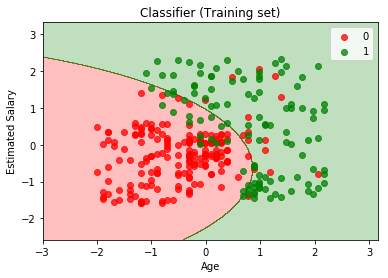

In [52]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_Train, y_Train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, alpha = 0.75)

    plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

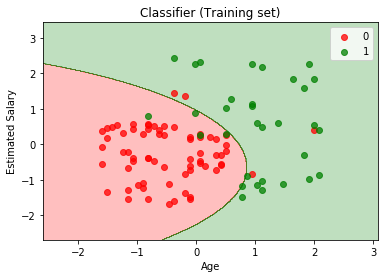

In [53]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_Test, y_Test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, alpha = 0.75)

    plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()